In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001169770"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001169770
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,"BANC OF CALIFORNIA, INC."
Ticker,BANC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,12.0,1.936417e+01,1.448940e+00,16.8,1.886250e+01,1.931500e+01,1.983750e+01,2.298000e+01
interest income,60.0,3.590450e+07,3.623501e+07,7743000.0,1.032100e+07,1.192050e+07,6.179600e+07,1.111300e+08
net income,58.0,5.883500e+06,8.806148e+06,-8534000.0,8.487500e+05,1.355500e+06,1.108150e+07,3.593700e+07
net interest income,60.0,2.706775e+07,2.889283e+07,3959000.0,5.121000e+06,7.573000e+06,5.252375e+07,8.705800e+07
provision for loan losses,43.0,2.325209e+06,3.252149e+06,-212000.0,3.000000e+05,1.769000e+06,2.681000e+06,1.949900e+07


# Plots

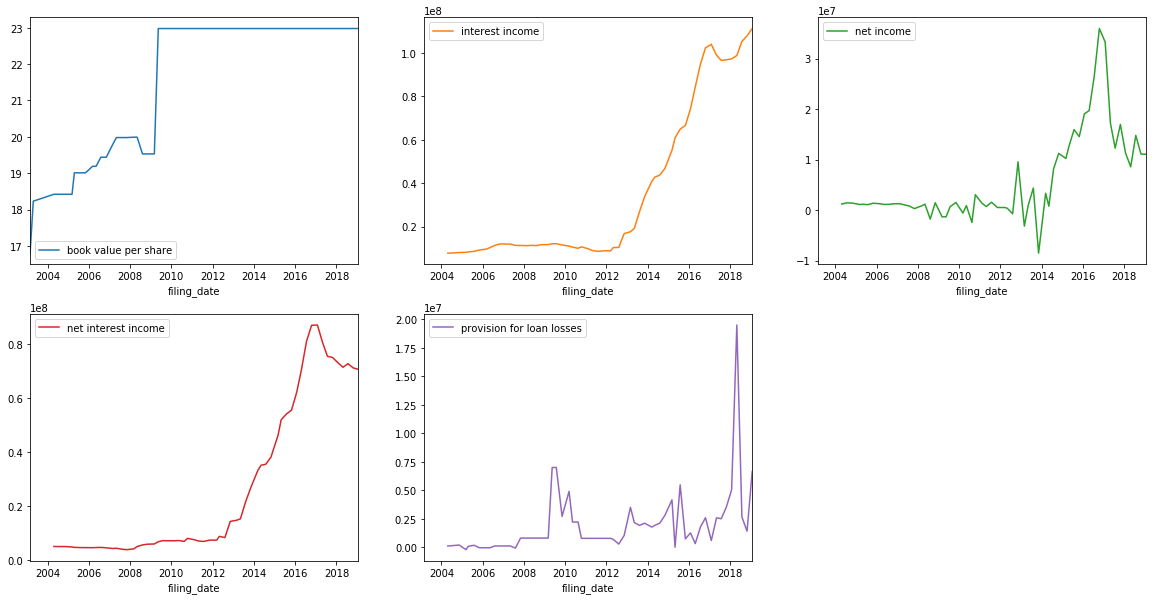

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001169770 book value per share        2003Q2 to 2003Q4: 3 periods  missing   
           book value per share        2004Q2 to 2004Q4: 3 periods  missing   
           book value per share                             2005Q2  missing   
           book value per share                             2006Q1  missing   
           book value per share                             2006Q3  missing   
           book value per share        2007Q2 to 2007Q3: 2 periods  missing   
           book value per share                             2008Q1  missing   
           book value per share        2008Q3 to 2008Q4: 2 periods  missing   
           book value per share       2009Q2 to 2018Q4: 39 periods  missing   
           interest income             2002Q4 to 2003Q4: 5 periods  missing   
           net income                  2002Q4 to 2003Q4: 5 periods  missing   
           net income                                       2009Q1  missing   
           net income                                       2011Q4  missing   
           net interest income         2002Q4 to 2003Q4: 5 periods  missing   
           provision for loan losses   2002Q4 to 2003Q4: 5 periods  missing   
           provision for loan losses   2005Q4 to 2006Q1: 2 periods  missing   
           provision for loan losses   2006Q3 to 2007Q1: 3 periods  missing   
           provision for loan losses   2007Q4 to 2008Q4: 5 periods  missing   
           provision for loan losses                        2009Q2  missing   
           provision for loan losses                        2010Q2  missing   
           provision for loan losses   2010Q4 to 2011Q4: 5 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001169770 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()